<a href="https://colab.research.google.com/github/MatteoAldovardi92/Taxi_Project/blob/main/Preprocessing_FeatureDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To save a copy to be retrived from other notebooks
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
combined_df = pd.read_csv('/content/drive/MyDrive/datasets/combined_dataset.csv')
combined_df['city_id'].value_counts()


,count
city_id,
quito,32298
mexico,12652
bogota,3052


In [ ]:
import kagglehub
import os
import pandas as pd
import kagglehub



# Download latest version
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

print("Path to dataset files:", path)


# Show files inside the dataset directory
print("Dataset contents:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

# Download the dataset
path = kagglehub.dataset_download("mnavas/taxi-routes-for-mexico-city-and-quito")

# Load each CSV as a separate DataFrame
bog_df = pd.read_csv(os.path.join(path, "bog_clean.csv"))
uio_df = pd.read_csv(os.path.join(path, "uio_clean.csv"))
mex_df = pd.read_csv(os.path.join(path, "mex_clean.csv"))
all_df = pd.read_csv(os.path.join(path, "all-data_clean.csv"))

# Preview one
print(all_df.head())




Path to dataset files: /kaggle/input/taxi-routes-for-mexico-city-and-quito
Dataset contents:
/kaggle/input/taxi-routes-for-mexico-city-and-quito/mex_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/uio_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/all-data_clean.csv
/kaggle/input/taxi-routes-for-mexico-city-and-quito/bog_clean.csv
   id              vendor_id      pickup_datetime     dropoff_datetime  \
0   1                  Quito  2016-09-17 09:32:06  2016-09-17 10:05:51   
1   2  Guadalajara Easy Taxi  2016-09-17 09:59:54  2016-09-17 10:06:23   
2   3              Monterrey  2016-09-17 10:06:52  2016-09-17 10:09:40   
3   4              Monterrey  2016-09-17 09:45:56  2016-09-17 10:13:34   
4   5              Monterrey  2016-09-17 10:12:00  2016-09-17 10:16:31   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          0.632055         0.528947         -78.549447         -0.361363   
1          0.327804         0.391950   

# Description of trip duration and desining of the rush hour variable.

### 🚕 Trip Duration Filtering Strategy

The first rational filtering approach is based on **physical feasibility**:  
To define a hard upper bound for trip duration, I consider the **worst-case scenario** — the **longest possible trip** at the **lowest reasonable average speed**.

However, while this would ideally rely on accurate trip **distances**, the dataset contains some **inadmissible distance values**, so I must filter the `trip_duration` feature **separately**.

To estimate an upper bound:

- The **maximum possible trip distance is 120 km**, based on how I previously clipped the coordinate points.
- I assume a **minimum average speed** of **20 km/h**, below which a motorized taxi would generally not be an optable choice.

Using these values, I obtain a conservative upper limit on duration:

$$
\frac{120\ \text{km}}{20\ \text{km/h}} = 6\ \text{hours}
$$

To apply an even stricter filter, I round down slightly:

$$
\frac{100\ \text{km}}{20\ \text{km/h}} = 5\ \text{hours}
$$

As a result, I filter out any trips longer than **5 hours** (18,000 seconds), as they are likely to be **data errors** or **non-taxi rides**:

```python
combined_df = combined_df[(combined_df['trip_duration'] <= 5 * 3600) & (combined_df['trip_duration'] > 0) ]



In [ ]:
combined_df = combined_df[(combined_df['trip_duration'] <= 5 * 3600) & (combined_df['trip_duration'] > 0) ]

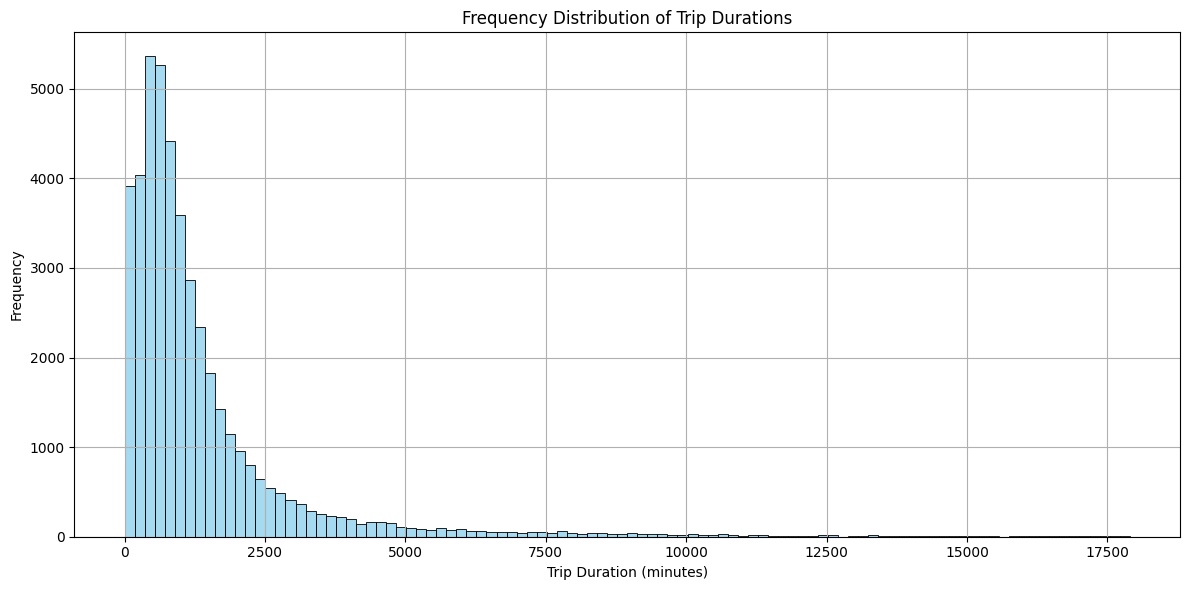

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot histogram with log scale for y-axis if there are many short trips
sns.histplot(combined_df['trip_duration'], bins=100, kde=False, color='skyblue')

plt.title('Frequency Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
combined_df['trip_duration'].describe()
17802/3600

4.945

In [ ]:
combined_df['trip_duration'].describe()

,trip_duration
count,44416.000000
mean,1462.196438
std,2036.942891
min,2.000000
25%,468.000000
50%,863.000000
75%,1578.000000
max,17955.000000


In [ ]:
combined_df

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,city_id
0,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346,quito
1,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456,quito
3,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302,quito
4,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314,quito
5,Quito,2016-08-27 04:19:02,2016-08-27 04:44:12,-78.509202,-0.194839,-78.518764,-0.228794,N,1510,5820,630,quito
...,...,...,...,...,...,...,...,...,...,...,...,...
32291,Quito,2016-10-27 08:13:06,2016-10-27 08:26:49,-78.559305,-0.279975,-78.554070,-0.314890,N,823,5012,198,quito
32292,Quito,2016-10-27 07:43:47,2016-10-27 08:52:40,-78.501332,-0.205046,-78.429927,-0.329160,N,4133,17581,1165,quito
32293,Quito,2016-10-27 08:36:09,2016-10-27 09:19:59,-78.485382,-0.174790,-78.487138,-0.175598,N,2631,4872,2006,quito
32296,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,-78.550264,-0.256730,-78.550306,-0.256756,N,91,43,70,quito


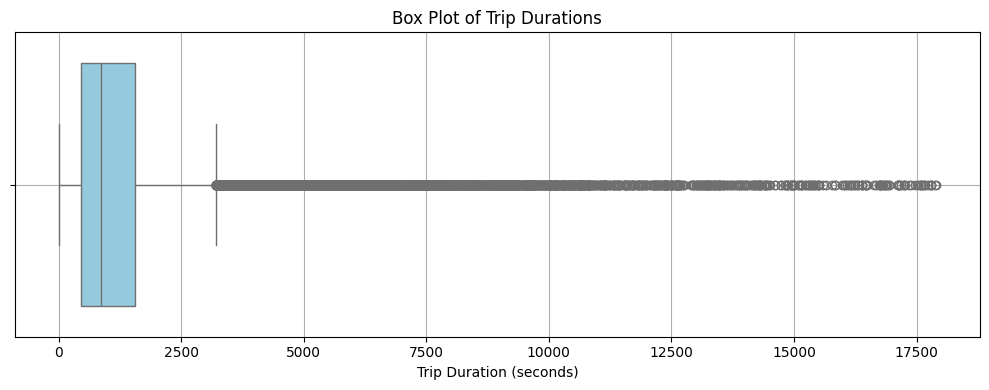

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

sns.boxplot(x=combined_df['trip_duration'], color='skyblue')

plt.xlabel('Trip Duration (seconds)')
plt.title('Box Plot of Trip Durations')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def get_duration_discrepancy_mask(df, max_duration_hours=3, tolerance=60):
    """
    Returns a boolean mask where trip_duration > max_duration_hours * 3600
    and differs from actual duration by more than `tolerance` seconds.

    Parameters:
    - df: pandas DataFrame with 'pickup_datetime' and 'dropoff_datetime' columns.
    - max_duration_hours: threshold for excessive duration in hours.
    - tolerance: allowable difference in seconds between trip_duration and computed duration.
    """
    pickup_dt = pd.to_datetime(df['pickup_datetime'])
    dropoff_dt = pd.to_datetime(df['dropoff_datetime'])

    computed_duration = (dropoff_dt - pickup_dt).dt.total_seconds()
    max_duration_seconds = max_duration_hours * 3600

    mask = (
        (df['trip_duration'] > max_duration_seconds) &
        (abs(df['trip_duration'] - computed_duration) > tolerance)
    )
    return mask



In [ ]:
mask_duration_discrepancy = get_duration_discrepancy_mask(combined_df, max_duration_hours=3, tolerance=60)

In [ ]:
combined_df = combined_df[~mask_duration_discrepancy]

<ipython-input-163-ef272f91ab0b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df = combined_df[~mask_duration_discrepancy]


In [ ]:
# Drop a useless column only useful to combine our dataset with other taxi datasets
combined_df = combined_df.drop(columns=['store_and_fwd_flag'])

KeyError: "['store_and_fwd_flag'] not found in axis"

# Observe if the mean is higher around some Christian holidays and around certain hours specifically the windows (7-9) and (17-19) all the trips in that window will be considered



In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

def is_majority_rush_hour(pickup, dropoff, min_fraction=2/3):
    rush_hours = [(7, 9), (16, 19)]  # Inclusive start, exclusive end
    total_seconds = (dropoff - pickup).total_seconds()
    if total_seconds == 0:
        return False

    # Sample every minute of the trip
    minutes = int(total_seconds // 60)
    rush_minutes = 0

    for i in range(minutes + 1):
        current_time = pickup + timedelta(minutes=i)
        hour = current_time.hour
        if any(start <= hour < end for (start, end) in rush_hours):
            rush_minutes += 1

    return (rush_minutes / max(1, minutes)) >= min_fraction

# Create the mask
mask_majority_rush = combined_df.apply(
    lambda row: is_majority_rush_hour(
        pd.to_datetime(row['pickup_datetime']),
        pd.to_datetime(row['dropoff_datetime']),
        min_fraction=2/3  # You can adjust this value
    ),
    axis=1
)



In [ ]:
combined_df['mostly_rush_hour'] = mask_majority_rush

# Mean Velocities



In [ ]:
combined_df['means_velocity'] = combined_df['dist_meters']/combined_df['trip_duration']

In [ ]:
import numpy as np

# Calculate computed duration in seconds
duration_computed = (combined_df['dropoff_datetime'] - combined_df['pickup_datetime']).dt.total_seconds()

# Avoid division by zero
valid_duration = (combined_df['trip_duration'] > 0) & (duration_computed > 0)

# Adjustable tolerance parameters
rtol = 1e-3  # relative tolerance (e.g. 0.1% difference allowed)
atol = 1     # absolute tolerance in seconds or speed units

# Compare average speeds within tolerance
mask = (
    valid_duration &
    np.isclose(
        combined_df['dist_meters'] / combined_df['trip_duration'],
        combined_df['dist_meters'] / duration_computed,
        rtol=rtol,
        atol=atol
    )
)



In [ ]:
mask.sum() # This last mask is true 42863 pretty close to 44210.
           # This last filter deliver a sliglty better dataset
           # The mean velocity has been checked in two independent ways

np.int64(42863)

In [ ]:
combined_df = combined_df[mask]

# Geodetic Distances

Are there significant discrepancy between dist_meters and geodetic distances.

In [ ]:
from geopy.distance import geodesic  # or great_circle if preferred
import numpy as np

# Extract coordinates as tuples
pickup_locations = combined_df[['pickup_latitude', 'pickup_longitude']].values
dropoff_locations = combined_df[['dropoff_latitude', 'dropoff_longitude']].values

# Compute geodetic distances in meters
def compute_geodetic(pickup, dropoff):
    try:
        return geodesic(pickup, dropoff).meters
    except:
        return np.nan

# Vectorized application with fallback to avoid errors
geodetic_distances = [
    compute_geodetic(p, d) for p, d in zip(pickup_locations, dropoff_locations)
]

combined_df['geodetic_distance'] = geodetic_distances

<ipython-input-167-50c8e0f9bb0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['geodetic_distance'] = geodetic_distances


# Save our progress:

In [ ]:
import os
import pandas as pd

# Define path inside Google Drive
drive_path = '/content/drive/MyDrive/datasets'

# Create the folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Save your DataFrame as CSV
combined_df.to_csv(os.path.join(drive_path, 'combined_dataset1.csv'), index=False)